In [43]:
account = '12345678'

order_types = {
    "market": "1",
    "limit": "2",
    "stop": "3",
    "stop limit": "4",
    "trailing stop": "P",
    "moc": "1",
}

side_dict = {
    "buy": "1",
    "sell": "2",
    "short": "5",
    "cover": "1",
}



    def trade(side, order_type, symbol, quantity, limit_price=0, stop_price=0):
        order = {"TmInForce": f'{"7" if order_type == "moc" else "0"}', "Typ": order_types[order_type],
                 "Side": side_dict[side], "Acct": f'{account}'}
        
        if order_type in ['limit', 'stop limit']:
            order["Px"] = str(limit_price)
        if order_type in ['stop', 'stop limit']:
            order["StopPx"] = str(stop_price)
        
        return order
    
trade("sell", "limit", "BABA", 15, limit_price=15.14, stop_price=17.00)

{'Acct': '12345678', 'Px': '15.14', 'Side': '2', 'TmInForce': '0', 'Typ': '2'}

In [44]:
100000 * .005 - 10

490.0

In [45]:
198.0925 * 1.01

200.07342500000001

In [2]:
# make the FIXML body

In [9]:
import xml.etree.ElementTree as et
from xml.etree.ElementTree import Element, SubElement, dump

In [10]:

xml_declaration = '<?xml version="1.0" encoding="UTF-8"?>'

declaration = Element(xml_declaration)
root = Element("FIXML", {'xmlns': 'http://www.fixprotocol.org/FIXML-5-0-SP2'})
order = SubElement(root, "Order", {"TmInForce": f'{params["time_in_force"]}', 
                                   "Typ": f'{params["trade_type"]}', "Side": f'{params["side"]}', 
                                   "Acct": f'{params["account"]}'})
SubElement(order, "Instrmt", {"SecTyp": f'{params["security_type"]}', "Sym": f'{params["symbol"]}'})
SubElement(order, "OrdQty", {"Qty": f'{params["quantity"]}'})


pprint(et.tostring(root, encoding='utf8', method='xml'))

NameError: name 'params' is not defined

In [11]:
# dictionary of trade types
o

''' can be buy sell short cover '''
trade = 'buy'

xml_declaration = '<?xml version="1.0" encoding="UTF-8"?>'
declaration = Element(xml_declaration)
root = Element("FIXML", {'xmlns': 'http://www.fixprotocol.org/FIXML-5-0-SP2'})
if trade == 'buy':
order= SubElement(root, "Order", f"""{
    'TmInForce': {},
    'Typ': {},
    'Side': {},
    'Acct': {},
    'Px': {},
    'StopPx': {},
    'OrigId': {},
    'ExecInst': {}
    }""")
order = SubElement(root, "Order")

SyntaxError: invalid syntax (<ipython-input-11-d8bab30226f3>, line 2)

In [48]:
from functools import wraps

def taxes(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        result = int(original_function(*args, **kwargs) * .7)
        return result
    return wrapper

def transaction_costs(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        result = int(original_function(*args, **kwargs) - 10)
        return result
    return wrapper

@transaction_costs
@taxes
def income(principal, daily_return):
    return int(principal * daily_return * .01)

income(20000,2)

270

In [50]:
.13/40

# Note: 
#      Buying on limit at the bid price versus the market price (the ask price) 
#      alone can get me more than half of the way there. 0.30% of the 0.50%.

0.0032500000000000003

In [62]:
length = list()

with open("c:/users/nicho/Desktop/stock-trading/stock_trader/2018-01-22 ticker.csv", "r") as f:
    for line in f.readlines():
        if len(line.split(',')) == 96:
            length.append(line.split(',')[76])

length

['AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',


0.005

In [94]:
new_index = df.symbol.unique()
ndf = df.copy()
ndf.reindex(new_index)

,adp_100,adp_200,adp_50,adv_21,adv_30,adv_90,ask,ask_time,asksz,basis,...,wk52hidate,wk52lo,wk52lodate,xdate,xday,xmonth,xyear,yield,spread,from-avg
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
import pandas as pd

headers = ['adp_100', 'adp_200', 'adp_50', 'adv_21', 'adv_30', 'adv_90', 'ask', 'ask_time', 'asksz', 'basis', 'beta', 'bid', 'bid_time', 'bidsz', 'bidtick', 'chg', 'chg_sign', 'chg_t', 'cl', 'contract_size', 'cusip', 'date', 'datetime', 'days_to_expiration', 'div', 'divexdate', 'divfreq', 'divpaydt', 'dollar_value', 'eps', 'exch', 'exch_desc', 'hi', 'iad', 'idelta', 'igamma', 'imp_volatility', 'incr_vl', 'irho', 'issue_desc', 'itheta', 'ivega', 'last', 'lo', 'name', 'op_delivery', 'op_flag', 'op_style', 'op_subclass', 'openinterest', 'opn', 'opt_val', 'pchg', 'pchg_sign', 'pcls', 'pe', 'phi', 'plo', 'popn', 'pr_adp_100', 'pr_adp_200', 'pr_adp_50', 'pr_date', 'pr_openinterest', 'prbook', 'prchg', 'prem_mult', 'put_call', 'pvol', 'qcond', 'rootsymbol', 'secclass', 'sesn', 'sho', 'strikeprice', 'symbol', 'tcond', 'timestamp', 'tr_num', 'tradetick', 'trend', 'under_cusip', 'undersymbol', 'vl', 'volatility12', 'vwap', 'wk52hi', 'wk52hidate', 'wk52lo', 'wk52lodate', 'xdate', 'xday', 'xmonth', 'xyear', 'yield']
df = pd.read_csv("c:/Users/Nicholas/Desktop/stock-trading/stock_trader/ticker/ticks/2018-01-24 ticker.csv", parse_dates=True, names=headers)
df["ask_time"] = df.ask_time.str.replace(":","").astype('int64')
# df["ask_time"] = df.ask_time.astype(int)
df["spread"] = df.bidsz - df.asksz
df["from-avg"] = (df.ask - df.vwap) / df.ask * 100

df['rollin'] = df['bid'].rolling(window=300).mean()
df['difference'] = df['ask'].diff()
df['delta'] = (df['ask'] - df['opn']) / df['opn']

In [74]:
df.drop_duplicates(subset=['symbol', 'timestamp'], keep=False)

,adp_100,adp_200,adp_50,adv_21,adv_30,adv_90,ask,ask_time,asksz,basis,...,xdate,xday,xmonth,xyear,yield,spread,from-avg,rollin,difference,delta
198,324.5120,336.4211,329.6757,6258126,5744118,6206411,351.53,1008,1,na,...,na,na,na,na,na,1,0.125167,NaN,226.36,-0.008602
199,24.7923,23.4955,27.5912,9747756,9008174,11282168,29.71,1008,4,na,...,na,na,na,na,1.7059,3,0.319758,NaN,-321.82,0.008829
200,36.1180,36.9071,37.7130,30254406,27777696,35150634,37.24,1008,31,na,...,na,na,na,na,5.3778,-4,0.010741,NaN,7.53,-0.001341
201,12.4073,11.9089,12.6310,51840133,42542905,36769338,12.00,1008,174,na,...,na,na,na,na,5.0167,344,0.139167,NaN,-25.24,0.000000
202,43.2698,40.4987,42.6172,14488527,12087432,12873103,44.14,1008,8,na,...,na,na,na,na,3.5039,1,0.548256,NaN,32.14,0.014713
203,95.4164,87.3244,99.5836,8045884,7849156,8972598,106.12,1008,2,na,...,na,na,na,na,1.9264,0,0.016962,NaN,61.98,-0.002163
204,35.7048,32.8959,38.4200,8515735,7119144,6610981,40.00,1008,5,na,...,na,na,na,na,1.5083,2,0.047500,NaN,-66.12,0.002758
205,205.7716,187.9418,206.2163,14430215,12682977,13398272,238.94,1008,1,na,...,na,na,na,na,0.2511,1,0.292542,NaN,198.94,-0.000418
206,180.7739,173.2361,179.7215,18650961,17540159,20027562,197.78,1008,1,na,...,na,na,na,na,na,0,0.943675,NaN,-41.16,0.015767
207,18.8946,21.9383,17.7396,121186224,106666769,87889076,16.82,1008,115,na,...,na,na,na,na,2.8419,-13,-1.393579,NaN,-180.96,-0.010588


In [75]:
import numpy as np
table = pd.pivot_table(df, index='timestamp', columns=['symbol'], values='delta')
table

symbol,AAPL,AMD,BABA,F,GE,GLW,GM,KR,MSFT,NSC,NVDA,SYF,T,TSLA,V,WMT,XOM,ZG
timestamp,,,,,,,,,,,,,,,,,,
1516806478,-0.009873,-0.003840,0.015870,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008104,-0.001592,-0.000628,0.002758,-0.001341,-0.008574,0.000960,-0.002257,0.001695,0.009604
1516806479,-0.009892,-0.003840,0.015870,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008104,-0.001703,-0.000628,0.002758,-0.001341,-0.008574,0.000960,-0.002257,0.001695,0.009757
1516806480,-0.009760,-0.003840,0.015664,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008140,-0.001459,-0.000628,0.002758,-0.001341,-0.008686,0.000986,-0.002225,0.001808,0.010062
1516806481,-0.009779,-0.003840,0.015699,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008248,-0.001459,-0.000558,0.002758,-0.001341,-0.008686,0.000960,-0.002163,0.001883,0.010062
1516806482,-0.009873,-0.003840,0.015767,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008320,-0.001459,-0.000418,0.002758,-0.001341,-0.008602,0.000960,-0.002163,0.001808,0.010062
1516806484,-0.010042,-0.003840,0.015767,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008320,-0.001459,-0.000460,0.002758,-0.001341,-0.008602,0.000960,-0.002257,0.002034,0.010062
1516806485,-0.010071,-0.003840,0.015972,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008374,-0.001459,-0.000418,0.002758,-0.001341,-0.008827,0.000960,-0.002210,0.002034,0.010062
1516806486,-0.010155,-0.003840,0.015972,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008428,-0.001459,-0.000418,0.002758,-0.001207,-0.008827,0.000960,-0.002163,0.002034,0.010062
1516806487,-0.010155,-0.003840,0.015972,0.000000,-0.010588,-0.003461,0.014713,0.008829,0.008428,-0.001459,-0.000293,0.002758,-0.001073,-0.008827,0.001040,-0.002163,0.002034,0.010062


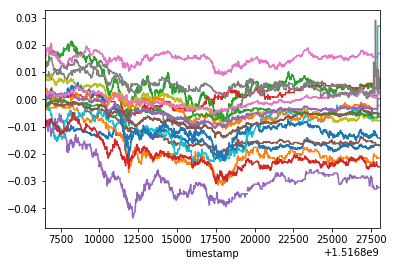

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

table.plot(legend=False)
plt.show()

In [ ]:
tadf['rollin'] = pd.rolling_skew

In [ ]:
df['rollin'] = pd.rolling_skew

In [56]:
import os
os.path.join(os.path.dirname(os.path.abspath(__file__)) + "ticks", date + " ticker.csv")

NameError: name '__file__' is not defined